# illustrate using Pandas and json IO to Access Data from Hurricane Ian

In [1]:
# adding a "widget" to be able to zoom into figures
# the % in the next line indicates that using a linux command
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#access a function from the urllib module
from urllib.request import urlretrieve
#also let's use a linux command to see the file size
import os

#plotting on a map requires cartopy
# See Chapter 13
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#%pip list

In [3]:
# needed to handle dates. See Chapter 15
from datetime import datetime,timezone
#adding a new module Pandas. See Chapter 16
import pandas as pd

json is a file format that uses human-readable text to store and transmit data objects consisting of attribute-value pairs 

Think of it like having the ability to transmit many python values, lists, and dictionaries  where each value is defined in terms of an attribute

In [4]:
#get the json module 
import json

We will be accessing public data from a commercial site for which I need to disclose that I am involved with the company, Synoptic Data:

- I am on the Board of Directors

- I am a shareholder

- I have a grant from that company to help with their customer support and research and development

In [5]:
#define time range in UTC
# 5 day period
start_time = '202209271200'
end_time =   '202210021200'
#originally I was doing this by day, but that adds complications
#url = "https://api.synopticdata.com/v2/stations/precip?state=fl&start="+start_time+"&end="+end_time+"&pmode=intervals&interval=day&token=bace3f05279d4de1bb2f03011843709e"
#instead get the totals between the start and end time
url = "https://api.synopticdata.com/v2/stations/precip?state=fl&start="+start_time+"&end="+end_time+"&pmode=totals&interval=day&token=bace3f05279d4de1bb2f03011843709e"
print(url)

# define the file to write the data into
filename = "ian_fl_ppt.json"
#let's try if we can get the file from the web
try:
    #get the file over the web
    urlretrieve(url, filename)
    print("Saved", filename, os.path.getsize(filename)/1000., 'KB')
except:
    print("something wrong grabbing the file")
    print("but the program continues, so may be in error")
    
#what's the file size?

https://api.synopticdata.com/v2/stations/precip?state=fl&start=202209271200&end=202210021200&pmode=totals&interval=day&token=bace3f05279d4de1bb2f03011843709e
Saved ian_fl_ppt.json 727.229 KB


# STOP

Click on the file to the left with that name that has a "dictionary" type icon {:}

Click on one right pointing arrow so it points down

What do you see?

Click on other ones

Lots of info here! Check it out!

Look carefully. How many indents to get to the total for the first station?

In [6]:
#read the data by opening the file and reading all of it
in_file = open('ian_fl_ppt.json').read()
data = json.loads(in_file)
#print(data)

In [7]:
#now lets try to make sense of all the info available by putting it into a pandas dataframe
# the json_normalize function in Pandas flattens the json structure to make it easier to handle
df_json = pd.json_normalize(data,record_path=['STATION'])
#STOP! 
#look at all the columns. Note the rows are the stations
df_json

STATUS MNET_ID ELEVATION                             NAME   STID  \
0     ACTIVE       2        27                          SUMATRA  SURF1   
1     ACTIVE       2         8                            OASIS  OASF1   
2     ACTIVE       1        20  Melbourne International Airport   KMLB   
3     ACTIVE       1        44              Perry-Foley Airport   KFPY   
4     ACTIVE       1        20       Apalachicola, Apalachicola   KAAF   
...      ...     ...       ...                              ...    ...   
1331  ACTIVE     249        26                Pine Crest School  2000W   
1332  ACTIVE     249       161     FSWN Emergency Response Unit  2003W   
1333  ACTIVE      65         6           N3FTU CLEARWATER BEACH  AV996   
1334  ACTIVE      65        72             GW2374 Big Bear Lake  G2374   
1335  ACTIVE      65       121                GW2392 Windermere  G2392   

     ELEV_DEM   LONGITUDE STATE  RESTRICTED   LATITUDE          TIMEZONE  \
0        26.2  -84.986110    FL       False  30.020560  America/New_York   
1        16.4     -81.033    FL       False  25.860389  America/New_York   
2          23   -80.63560    FL       False   28.09973  America/New_York   
3        65.6   -83.58154    FL       False   30.07081  America/New_York   
4        13.1   -85.02472    FL       False   29.72694  America/New_York   
...       ...         ...   ...         ...        ...               ...   
1331     None   -80.12401    FL       False   26.20460  America/New_York   
1332     None   -84.21333    FL       False   30.53596  America/New_York   
1333     None   -82.82617    FL       False   27.97200  America/New_York   
1334     None   -82.40000    FL       False   28.20000  America/New_York   
1335    118.1   -81.60117    FL       False   28.49633  America/New_York   

          ID PERIOD_OF_RECORD.start  PERIOD_OF_RECORD.end UNITS.position  \
0       3436   2004-12-27T00:00:00Z  2022-10-04T19:48:00Z              m   
1       3470   2001-06-26T00:00:00Z  2022-10-04T19:37:00Z              m   
2       4136   2002-08-12T00:00:00Z  2022-10-04T20:15:00Z              m   
3       4193   2002-08-14T00:00:00Z  2022-10-04T20:15:00Z              m   
4       4239   2002-08-14T00:00:00Z  2022-10-04T20:15:00Z              m   
...      ...                    ...                   ...            ...   
1331  178008   2022-09-13T16:10:00Z  2022-10-04T20:10:00Z              m   
1332  178009   2022-09-13T16:25:00Z  2022-10-04T18:30:00Z              m   
1333  178036   2022-09-15T22:09:00Z  2022-10-04T20:20:00Z              m   
1334  178245   2022-09-28T03:20:00Z  2022-10-04T20:18:00Z              m   
1335  178294   2022-09-30T20:09:00Z  2022-10-04T20:19:00Z              m   

     UNITS.elevation                         OBSERVATIONS.precipitation  
0                 ft  [{'count': 120, 'first_report': '2022-09-27T11...  
1                 ft  [{'count': 120, 'first_report': '2022-09-27T11...  
2                 ft  [{'count': 210, 'first_report': '2022-09-27T11...  
3                 ft  [{'count': 359, 'first_report': '2022-09-27T11...  
4                 ft  [{'count': 120, 'first_report': '2022-09-27T11...  
...              ...                                                ...  
1331              ft  [{'count': 660, 'first_report': '2022-09-27T12...  
1332              ft  [{'count': 18, 'first_report': '2022-09-27T12:...  
1333              ft  [{'count': 1435, 'first_report': '2022-09-27T1...  
1334              ft  [{'count': 1150, 'first_report': '2022-09-28T0...  
1335              ft  [{'count': 483, 'first_report': '2022-09-30T19...  

[1336 rows x 17 columns]

In [8]:
#print out all the columns
for col in range(len(df_json.columns)):
    print(col,df_json.columns[col])   

0 STATUS
1 MNET_ID
2 ELEVATION
3 NAME
4 STID
5 ELEV_DEM
6 LONGITUDE
7 STATE
8 RESTRICTED
9 LATITUDE
10 TIMEZONE
11 ID
12 PERIOD_OF_RECORD.start
13 PERIOD_OF_RECORD.end
14 UNITS.position
15 UNITS.elevation
16 OBSERVATIONS.precipitation


In [9]:
#the column of main interest is #16 OBSERVATIONS.precipitation
#ugly name let's change it
df_json.rename(columns = {'OBSERVATIONS.precipitation':'precip'}, inplace = True)
print(df_json.columns[16])   

precip


In [10]:
#create a pandas data frame wth ID, lat, lon, and total precipitation
df_ppt = df_json[['STID','LATITUDE','LONGITUDE','precip']]
df_ppt = df_ppt.set_index(['STID'])
print(type(df_ppt['precip']))
#how do we get to the 2nd stations total precip?
print(df_ppt['precip'][1][0]['total'])
#there are some nan's! a way to sort that out is to compare the type of object as done below

#some debugging steps while figuring this out
test=df_ppt['precip'][15]
print(test,type(test))
test1 = df_ppt['precip'][14]
print(test1,type(test1))


<class 'pandas.core.series.Series'>
80.776
[{'count': 164, 'first_report': '2022-09-27T11:53:00Z', 'total': 0.8, 'last_report': '2022-10-02T11:53:00Z', 'report_type': 'precip_accum_one_hour'}] <class 'list'>
[{'count': 207, 'first_report': '2022-09-27T11:58:00Z', 'total': 68.751, 'last_report': '2022-10-02T11:53:00Z', 'report_type': 'precip_accum_one_hour'}] <class 'list'>


In [11]:
#how many stations

no_stid = len(df_ppt.LATITUDE)
#create numpy array with that size for precip values
p = np.ones(no_stid) 
print(no_stid)

#let's again simplify the dictionaries, switch from mm to cm  to get across the sense of iteration and handle nan's
# nan's show up when there is not a list
for no in range(0,no_stid):
    #is it a list. that is good. no list? then set as nan
    if isinstance(df_ppt['precip'][no],list):
        # change to cm
        pp = df_ppt['precip'][no][0]['total']/10.
        df_ppt['precip'][no][0]['total'] = pp
        # and for convenience  assign the precip to a numpy variable
        p[no] = pp
        #print(no,df_ppt.index[no],df_ppt.Latitude[no],df_ppt.Longitude[no],p[no])
    else:
        p[no] = np.nan
        print('missing ppt',df_ppt.index[no])


1336


In [12]:
#now let's clean this up 
#put the values into the dataframe
df_ppt['TOTALS'] = p.tolist()
#remove the precip column that is really ugly to deal with
df_ppt.drop(columns=['precip'],inplace=True)
#they are a string unless they are defined as floats
df_ppt.LONGITUDE = df_ppt.LONGITUDE.astype('float64')
df_ppt.LATITUDE = df_ppt.LATITUDE.astype('float64')
df_ppt.TOTALS = df_ppt.TOTALS.astype('float64')
df_ppt

LATITUDE  LONGITUDE   TOTALS
STID                                
SURF1  30.020560  -84.98611   0.0000
OASF1  25.860389  -81.03300   8.0776
KMLB   28.099730  -80.63560  10.8334
KFPY   30.070810  -83.58154   0.0000
KAAF   29.726940  -85.02472   0.0000
...          ...        ...      ...
2000W  26.204600  -80.12401  20.5994
2003W  30.535960  -84.21333   0.0000
AV996  27.972000  -82.82617   0.6604
G2374  28.200000  -82.40000   5.6896
G2392  28.496330  -81.60117   0.0000

[1336 rows x 3 columns]

In [13]:
#sort the rows by the TOTALS values
ppt_sorted=df_ppt.sort_values(by=['TOTALS'],ascending=False)
ppt_sorted[0:100]
#are those super large realistic?
# 30 inches is a lot of water ~75 cm

LATITUDE  LONGITUDE    TOTALS
STID                                
0369W  26.46131  -81.77957  985.7770
0834W  29.12042  -80.95339  895.9338
SSSBU  26.09212  -80.10982  304.4160
1866W  29.26585  -81.22758   90.0434
1334W  29.57435  -81.18766   82.9570
...         ...        ...       ...
E9392  29.18833  -81.07317   24.7908
0323W  25.71442  -80.28235   24.5360
G1444  26.49833  -82.08867   24.4856
1355W  26.23780  -80.23769   24.3332
AV797  27.71100  -82.35917   24.2316

[100 rows x 3 columns]

In [14]:
#let's put those in their own dataframe
# and remove them from the main dataframe for now and figure out what's haywire later
df_ppt_big = df_ppt[df_ppt['TOTALS'] > 75.]
df_ppt_big

LATITUDE  LONGITUDE    TOTALS
STID                                
0369W  26.46131  -81.77957  985.7770
0834W  29.12042  -80.95339  895.9338
1334W  29.57435  -81.18766   82.9570
1342W  28.62773  -81.40158   76.1740
SSSBU  26.09212  -80.10982  304.4160
1866W  29.26585  -81.22758   90.0434

In [15]:
#negative precipitation totals?
#that means calculating the totals over multiple days can be messed up
#let's remove those for now and figure out what's haywire later
df_ppt_neg = df_ppt[df_ppt['TOTALS'] < 0.]
df_ppt_neg

LATITUDE  LONGITUDE   TOTALS
STID                               
0335W  27.22227  -81.86353  -0.4064
0368W  26.42380  -81.42700  -1.7264
0370W  27.00014  -82.07607  -6.6548
0465W  25.74262  -80.34718  -1.0160
0511W  27.77185  -82.63815 -44.6786
0525W  28.10286  -81.62503  -1.8800

In [16]:
# let's remove those rows for too big and negative values
# first find which indices are associated with those conditions
# then drop and use the inplace=True to keep in the same dataframe
df_ppt.drop((df_ppt.loc[df_ppt['TOTALS']<0.].index), inplace=True)
df_ppt.drop((df_ppt.loc[df_ppt['TOTALS']>75.].index), inplace=True)

In [17]:
# get some of the basic stats to check
basic_vals = df_ppt.describe(percentiles=[.05,.10,.25,.33,.50,.66,.75,.90,.95])
print(basic_vals)

          LATITUDE    LONGITUDE       TOTALS
count  1324.000000  1324.000000  1324.000000
mean     28.377458   -82.300921     7.849287
std       1.697784     1.883600    10.375621
min       9.004970   -87.500500     0.000000
5%       25.785583   -86.568892     0.000000
10%      26.146605   -85.486780     0.000000
25%      27.198903   -82.788427     0.000000
33%      27.707720   -82.570070     0.218186
50%      28.202585   -81.910250     4.737100
66%      29.358076   -81.317826     8.970772
75%      30.047232   -80.899933    10.947500
90%      30.488252   -80.266960    20.119340
95%      30.658355   -80.162277    28.503615
max      30.974020   -79.589440    73.685600


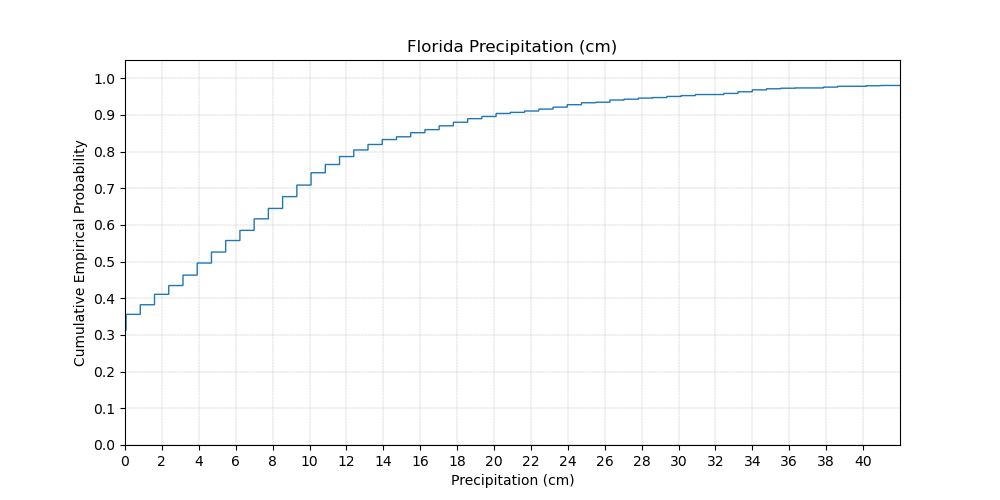

In [18]:
# plot the cumulative histogram for precipitation in Florida
fig1,ax = plt.subplots(1,1,figsize=(10,5))
# Hide the Figure name at the top of the figure
fig1.canvas.header_visible = False
# Always showthe toolbar
fig1.canvas.toolbar_visible = True
#using the numpy array p defined earlier
n_bins = len(p)
n, bins, patches = ax.hist(p, n_bins, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax.set(xlabel="Precipitation (cm)",ylabel='Cumulative Empirical Probability')
ax.set(xlim=(0,42.))
ax.set_xticks(np.arange(0,42.,step=2))
ax.set_yticks(np.arange(0, 1.1, step=0.10))
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set(title="Florida Precipitation (cm)")
plt.savefig('fl_ppt.png')


        LATITUDE  LONGITUDE   TOTALS
STID                                
KDAB   29.173540 -81.071860  34.9952
KMCO   28.418260 -81.324130  33.5320
KSFB   28.783330 -81.250000  40.8988
KTTS   28.616670 -80.700000  28.5537
MRFF1  28.640833 -80.730833  31.2170
...          ...        ...      ...
1980W  26.462070 -80.078610  26.2890
PNAFL  28.080900 -81.411400  26.1366
1991W  28.181830 -82.159180  26.8478
1993W  26.703140 -80.035940  23.5204
2000W  26.204600 -80.124010  20.5994

[137 rows x 3 columns]


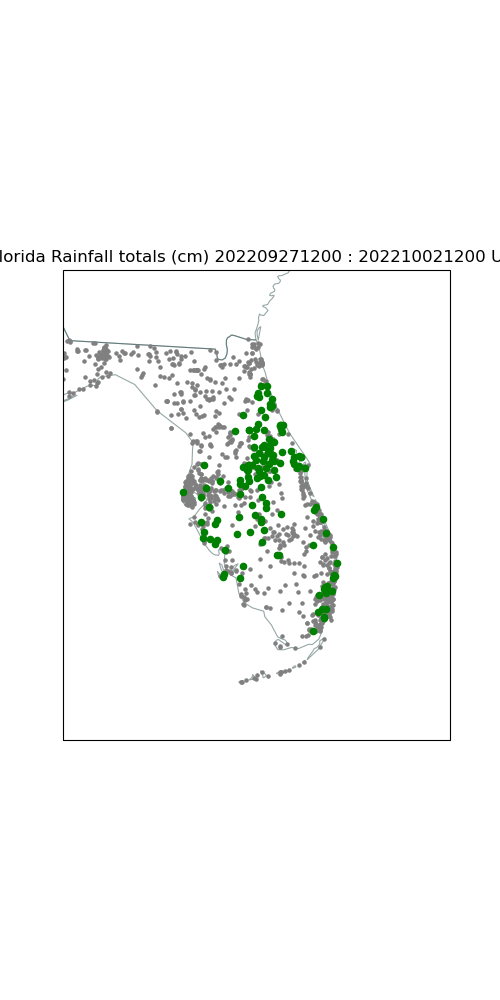

In [19]:

fig2 = plt.figure(figsize=(5,10))
# Hide the Figure name at the top of the figure
fig2.canvas.header_visible = False
# Always showthe toolbar
fig2.canvas.toolbar_visible = True
#define that the most basic projection: cylindricl equidistant: equal in lat and lon
ax = plt.axes(projection=ccrs.PlateCarree())
#what part of the globe?
ax.set_extent([-85., -78., 23.5, 32.], ccrs.PlateCarree())
#dd state outlines
states = cartopy.feature.NaturalEarthFeature(
                    category='cultural', scale='50m', facecolor='none',
                    name='admin_1_states_provinces')
ax.add_feature(states,zorder=2,edgecolor='darkslategrey',linewidth=0.8,alpha = 0.5)

# get locations as numpy arrays for plotting
x = df_ppt.LONGITUDE.to_numpy()
y = df_ppt.LATITUDE.to_numpy()

#plot all locations with a black dot
plt.scatter(x,y,zorder=2,s=5,c="grey")

#plot places with more than 20 cm as a larger green dot
#which locations have more than 20 cm?
p_gt_20 = df_ppt[df_ppt['TOTALS'] >= 20.]
print(p_gt_20)
x_g20 = p_gt_20.LONGITUDE.to_numpy()
y_g20 = p_gt_20.LATITUDE.to_numpy()
plt.scatter(x_g20,y_g20,zorder=10,s=20,c="green")

#wrap up
ax.set_title('Florida Rainfall totals (cm) %s : %s UTC' % (start_time, end_time), fontsize=12)
plt.show()
plt.savefig('florida_rainfall_totals.png')

        LATITUDE  LONGITUDE  TOTALS
STID                               
SURF1  30.020560 -84.986110     0.0
KFPY   30.070810 -83.581540     0.0
KAAF   29.726940 -85.024720     0.0
KCEW   30.772220 -86.520000     0.0
KCTY   29.633326 -83.105458     0.0
...          ...        ...     ...
1950W  29.636110 -83.126900     0.0
G2219  27.758670 -82.725500     0.0
SSEUH  28.759110 -81.523410     0.0
2003W  30.535960 -84.213330     0.0
G2392  28.496330 -81.601170     0.0

[389 rows x 3 columns]
0 0369W 985.777 986 -81.77957 26.46131
1 0834W 895.9338 896 -80.95339 29.12042
2 1334W 82.95700000000001 83 -81.18766 29.57435
3 1342W 76.174 76 -81.40158 28.62773
4 SSSBU 304.416 304 -80.10982 26.09212
5 1866W 90.04339999999999 90 -81.22758 29.26585


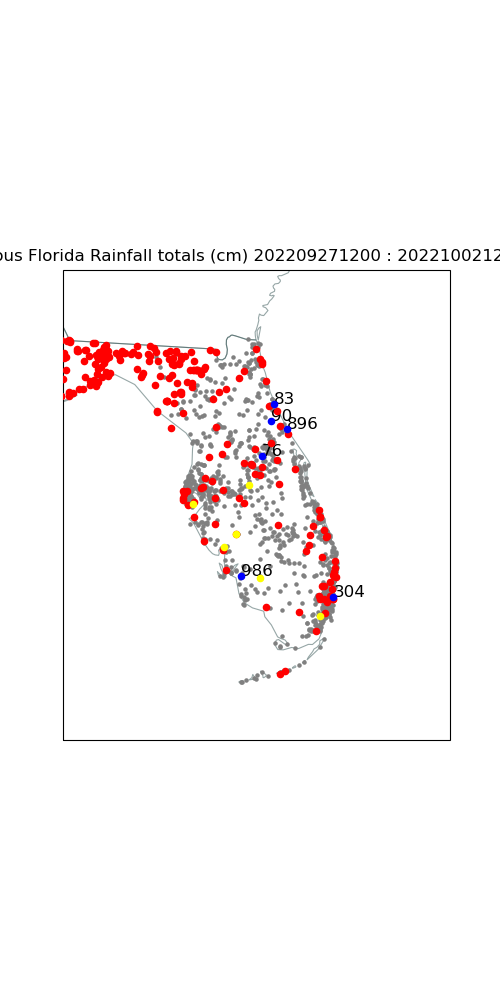

In [20]:
#what about possible outliers, where are they?
# > 75., < 0., and == 0.
fig3 = plt.figure(figsize=(5,10))
# Hide the Figure name at the top of the figure
fig3.canvas.header_visible = False
# Always showthe toolbar
fig3.canvas.toolbar_visible = True
#define that the most basic projection: cylindricl equidistant: equal in lat and lon
ax = plt.axes(projection=ccrs.PlateCarree())
#what part of the globe?
ax.set_extent([-85., -78., 23.5, 32.], ccrs.PlateCarree())
# state outlines
states = cartopy.feature.NaturalEarthFeature(
                    category='cultural', scale='50m', facecolor='none',
                    name='admin_1_states_provinces')
ax.add_feature(states,zorder=2,edgecolor='darkslategrey',linewidth=0.8,alpha = 0.5)

# get locations as numpy arrays for plotting
x = df_ppt.LONGITUDE.to_numpy()
y = df_ppt.LATITUDE.to_numpy()

#plot all locations with a grey dot
plt.scatter(x,y,zorder=2,s=5,c="grey")

#plot places eq 0 cm as a red dot
p_eq0 = df_ppt[df_ppt['TOTALS'] == 0.]
print(p_eq0)
x_eq0 = p_eq0.LONGITUDE.to_numpy()
y_eq0 = p_eq0.LATITUDE.to_numpy()
plt.scatter(x_eq0,y_eq0,zorder=10,s=20,c="red")

#plot places  < 0 cm as a yellow dot
x_neg = df_ppt_neg.LONGITUDE.to_numpy()
y_neg = df_ppt_neg.LATITUDE.to_numpy()
plt.scatter(x_neg,y_neg,zorder=10,s=20,c="yellow")

#plot places  > 75 cm as a blue dot
x_big = df_ppt_big.LONGITUDE.to_numpy()
y_big = df_ppt_big.LATITUDE.to_numpy()
plt.scatter(x_big,y_big,zorder=10,s=20,c="blue")

#where are the big values and what are their values?
#have to loop over all cases
for i, tot in enumerate(df_ppt_big.TOTALS.to_numpy()):
    # get the station id
    stid = df_ppt_big.index[i]
    # save the total as a string
    str_tot = "%.d" % np.round(tot)
    print(i,stid,tot,str_tot,x_big[i],y_big[i])
    #label the big totals
    ax.annotate(str_tot, (x_big[i], y_big[i]),size='large')

#wrap up
ax.set_title('Spurious Florida Rainfall totals (cm) %s : %s UTC' % (start_time, end_time), fontsize=12)
plt.savefig('florida_rainfall_totals_spurious.png')

# October 4 In-Class Exercise

In the cell immediately above:
- modify one line to label the locations of the big totals by the STID rather than the total
- copy  some lines to label the locations of the negative totals
- modify the figure title so it includes your unid (no name)
- copy the resulting figure to the class Teams page

# more to follow!

- are all the really large values realistic?
- what happens when the power goes out?
- how do we curate the data to get a better estimate of total rainfall?
